In [40]:
import collections
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toyplot

In [3]:
from deck import Deck
from idiots_delight import Idiots_Delight

In [6]:
def main():
    num_games = 10000
    results = []
    for i in range(num_games):
        deck = Deck()
        deck.shuffle_deck()
        game = Idiots_Delight(deck=deck)
        cards_remaining = game.play_game()
        results.append(cards_remaining)
    return results

In [10]:
data = main()

In [12]:
data_counts = collections.Counter(data)
data_probs = dict()
data_odds = dict()
for data_i, data_count in data_counts.iteritems():
    data_probs[data_i] = float(data_count) / len(data)
    data_odds[data_i] = round(1. / data_probs[data_i], 2)

In [27]:
win_rate = np.mean(np.array(data) == 4)
win_rate

0.0071000000000000004

Counter({16: 696, 15: 668, 14: 658, 13: 625, 17: 612, 18: 597, 19: 597, 12: 582, 11: 541, 10: 475, 20: 471, 21: 413, 9: 404, 22: 370, 8: 320, 23: 293, 24: 263, 7: 255, 25: 200, 6: 185, 26: 177, 27: 115, 5: 112, 29: 87, 28: 82, 4: 71, 30: 49, 31: 26, 32: 23, 35: 12, 33: 10, 34: 4, 36: 3, 38: 2, 37: 1, 40: 1})

{4: 0.0071, 5: 0.0112, 6: 0.0185, 7: 0.0255, 8: 0.032, 9: 0.0404, 10: 0.0475, 11: 0.0541, 12: 0.0582, 13: 0.0625, 14: 0.0658, 15: 0.0668, 16: 0.0696, 17: 0.0612, 18: 0.0597, 19: 0.0597, 20: 0.0471, 21: 0.0413, 22: 0.037, 23: 0.0293, 24: 0.0263, 25: 0.02, 26: 0.0177, 27: 0.0115, 28: 0.0082, 29: 0.0087, 30: 0.0049, 31: 0.0026, 32: 0.0023, 33: 0.001, 34: 0.0004, 35: 0.0012, 36: 0.0003, 37: 0.0001, 38: 0.0002, 40: 0.0001}

{4: 140.85, 5: 89.29, 6: 54.05, 7: 39.22, 8: 31.25, 9: 24.75, 10: 21.05, 11: 18.48, 12: 17.18, 13: 16.0, 14: 15.2, 15: 14.97, 16: 14.37, 17: 16.34, 18: 16.75, 19: 16.75, 20: 21.23, 21: 24.21, 22: 27.03, 23: 34.13, 24: 38.02, 25: 50.0, 26: 56.5, 27: 86.96, 28: 121.95

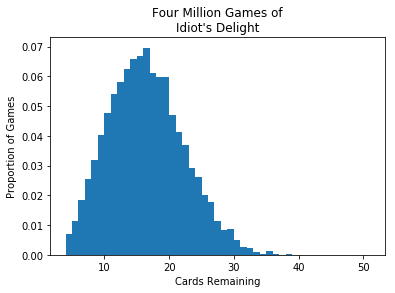

In [13]:
print data_counts
print ''
print data_probs
print ''
print data_odds

plt.hist(data, normed=1, bins=range(4, 52))
plt.title("Four Million Games of\nIdiot's Delight")
plt.xlabel("Cards Remaining")
plt.ylabel("Proportion of Games")
plt.show()

# Trying out toyplot

In [18]:
canvas = toyplot.Canvas(width=300, height=300)
axes = canvas.cartesian()
bars = axes.bars(np.histogram(data, 20))

0 10 20 30 40 0 500 1000 1500

In [23]:
canvas = toyplot.Canvas(width=500, height=300)
axes = canvas.cartesian()
mark = axes.scatterplot(sorted(data))

<ci

# Simulate for different parameters

In [130]:
num_suits_grid = range(2, 27)
num_nums_grid = range(2, 27) # number of cards PER suit
num_games_each = 10000

In [131]:
all_results = []
for num_suits in num_suits_grid:
    print num_suits
    for num_nums in num_nums_grid:
        results = []
        for i in range(num_games_each):
            deck = Deck(suit_labels=range(num_suits), card_values=range(num_nums))
            deck.shuffle_deck()
            game = Idiots_Delight(deck=deck)
            cards_remaining = game.play_game()
            results.append(cards_remaining)
        win_rate = np.mean(np.array(results) == num_suits)
        all_results.append((num_suits, num_nums, win_rate))
        

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [133]:
all_results = pd.DataFrame(all_results)

In [134]:
all_results.columns = ["num_suits", "num_nums", "win_rate"]

In [142]:
all_results

,num_suits,num_nums,win_rate
0,2,2,0.3396
1,2,3,0.0519
2,2,4,0.0320
3,2,5,0.0131
4,2,6,0.0083
5,2,7,0.0038
6,2,8,0.0022
7,2,9,0.0010
8,2,10,0.0010
9,2,11,0.0002


In [136]:
colormap = toyplot.color.brewer.map(
    name="Oranges",
    reverse=True,
    domain_min = all_results["win_rate"].min(),
    domain_max = all_results["win_rate"].max(),
)
size = [16, 9]

In [137]:
canvas = toyplot.Canvas(width=500, height=300)
axes = canvas.cartesian(label="Suits and cards effect on winning probability", xlabel="Number of suits", ylabel="Number of cards")
mark = axes.scatterplot(
    all_results.num_suits.tolist(),
    all_results.num_nums.tolist(),
    color=(all_results.win_rate.tolist(), colormap),
    size=size)
axes.color_scale(colormap, label="Win Prob");


0 10 20 30 Number of suits 0 10 20 30 Number of cards Suits and cards effect on winning probability 0.0 0.1 0.2 0.3 Win Prob

In [138]:
colormap = toyplot.color.brewer.map(
    name="Oranges",
    reverse=True,
    domain_min = all_results["num_nums"].min(),
    domain_max = all_results["num_nums"].max(),
)
size = [16, 9]

In [139]:
canvas = toyplot.Canvas(width=500, height=300)
axes = canvas.cartesian(label="Number of suits effect on winning probability colored by number of cards", xlabel="Number of suits", ylabel="Win Probability")
mark = axes.scatterplot(
    all_results.num_suits.tolist(),
    all_results.win_rate.tolist(),
    color=(all_results.num_nums.tolist(), colormap),
    size=size)
axes.color_scale(colormap, label="Number of cards");




0 10 20 30 Number of suits 0.0 0.1 0.2 0.3 Win Probability Number of suits effect on winning probability colored by number of cards 0 10 20 30 Number of cards

In [140]:
colormap = toyplot.color.brewer.map(
    name="Oranges",
    reverse=True,
    domain_min = all_results["num_suits"].min(),
    domain_max = all_results["num_suits"].max(),
)
size = [16, 9]

In [141]:
canvas = toyplot.Canvas(width=500, height=300)
axes = canvas.cartesian(label="Number of cards effect on winning probability colored by number of suits", xlabel="Number of cards", ylabel="Win Probability")
mark = axes.scatterplot(
    all_results.num_nums.tolist(),
    all_results.win_rate.tolist(),
    color=(all_results.num_suits.tolist(), colormap),
    size=size)
axes.color_scale(colormap, label="Number of suits");

0 10 20 30 Number of cards 0.0 0.1 0.2 0.3 Win Probability Number of cards effect on winning probability colored by number of suits 0 10 20 30 Number of suits